#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [ ]:
import numpy as np
import itertools
import time
import random
import matplotlib.pyplot as plt

# !nvidia-smi

In [ ]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [ ]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity
    self.indexes = list(range(len(weights)))

  def solve_knapsack_brute_force(self):
    maxPftbatch = []
    maxProfit = 0
    maxProfweight = 0

    for index in self.indexes:
      for batch in itertools.permutations(self.indexes, index + 1):
        weight = 0
        profit = 0

        for i in batch:
          weight += self.weights[i]
          profit += self.profits[i]

        if weight <= self.capacity and profit > maxProfit:
          maxProfit = profit
          mxPftbatch = batch
          maxProfweight = weight

    return  mxPftbatch, maxProfit, maxProfweight


  def solve_knapsack_pw_ratio(self):
    maxPftbatchR = []
    maxProfitR = 0
    maxProfweightR = 0
    ratio_list = []

    for w, p in zip(self.weights, self.profits):
      ratio = p/w
      ratio_list.append(ratio) # list comprehension zrobić

    sortedbyratio = sorted(zip(ratio_list, self.indexes, self.weights, self.profits), reverse= True)
    temp_weight = 0
    r,i,w,p = sortedbyratio.pop(0)
    temp_weight = w

    while temp_weight <= self.capacity:
      maxPftbatchR.append(i)
      maxProfitR += p
      maxProfweightR = temp_weight

      r,i,w,p = sortedbyratio.pop(0)
      temp_weight += w

    return  sorted(maxPftbatchR), maxProfitR, maxProfweightR



k1 = KnapSack(profits, weights, capacity)
print("Brute force method:")
i, p, w = k1.solve_knapsack_brute_force()
print("Idexes of chosen item:", i, "Total profit", p, ", total weight:", w)

print("Pw ratio method:")
i, p, w = k1.solve_knapsack_pw_ratio()
print("Idexes of chosen item:", i, "Total profit", p, ", total weight:", w)

Brute force method:
Idexes of chosen item: (1, 2) Total profit 17 , total weight: 8
Pw ratio method:
Idexes of chosen item: [1, 3] Total profit 14 , total weight: 5


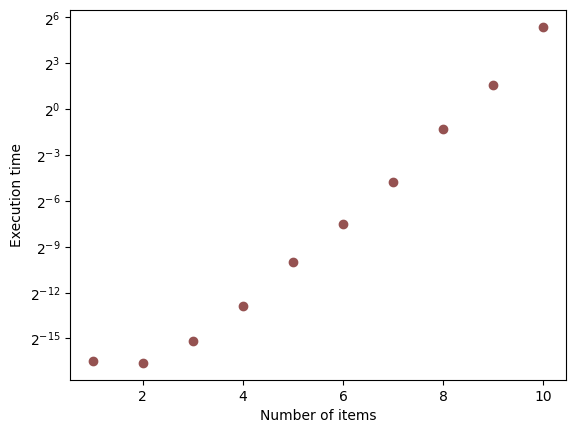

In [ ]:
weights_n = np.array([])
profits_n = np.array([])
durations = np.array([])
items = 10

for _ in range(1, items + 1):
  rand_weight = random.randint(1, 9)
  rand_profit = random.randint(1,30)
  weights_n = np.append(weights_n, rand_weight)
  profits_n = np.append(profits_n, rand_profit)
  k1 = KnapSack(profits_n, weights_n, capacity)
  # print("Brute force method for %s items:" % a)
  start_time = time.time()
  k1.solve_knapsack_brute_force()
  # k1.solve_knapsack_pw_ratio
  exec_duration = time.time() - start_time
  # print("Brute force method: %s seconds \n" % exec_duration )
  durations = np.append(durations, exec_duration)

plt.xlabel("Number of items")
plt.ylabel("Execution time")

plt.yscale('log',base=2)
plt.scatter(range(1,items + 1), durations, marker='o', c='#955251')

# plt.yscale('linear')
# plt.scatter(range(1,items + 1), durations, marker='o', c='#955251')


# Wnioski
Oczywiście może się zdarzyć, że obie metody będą miały takie same rozwiązania, ale to tylko w wypadku, gdy najlepsze dopasowanie rzeczy będzie składało się z przedmiotów, które mają największe współczynniki zysk/waga. Zazwyczaj jednak metoda wykorzystująca współczynnik będzie dawała trochę gorsze rozwiązania.

Zaletą metody brute force jest to, że znajdujemy najlesze rozwiązanie, jednak jak widać na wykresie, czas poszukiwań rośnie eksponencjalnie. Dla 10 przedmiotów wynosi już około 35 sekund, więc stosowanie tej metody jest korzystne tylko, gdy nie mamy do czynienia z dużą liczbą przedmiotów i potrzebujemy ten najlepszy wynik.

Drugą metodę można wykorzystać dla dużej ilości przedmiotów, ponieważ czas poszukiwań rośnie bardzo powoli w porównaniu do poprzedniej metody. Nawet dla kilku tysięcy przedmiotów nie przekraczas on sekundy. Ta metoda nie zapewnia nam zazwyczaj najlepszego wyniku, ale dobry, dzięki któremu jesteśmy w stanie w rozsądnym czasie mniej więcej określić na jaki zysk możemy liczyć/ skalę tego zysku.